In [18]:
import pandas as pd

In [26]:
from textblob import TextBlob

In [1]:
import nltk
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
import matplotlib.pyplot as plt

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize
from string import punctuation
from heapq import nlargest
from collections import defaultdict

In [4]:
import string

In [5]:
file = r"""C:\Users\ryana\Desktop\clear-ipo.txt"""

In [6]:
tokes = []
x = ""
with open(file, "r", encoding='utf-8') as f:
    print(f.readline(5))
    x = f.readlines()
    
y = ""
for line in x:
    y = y + line
tokes = word_tokenize(y)

S-1/A


In [7]:
freq = nltk.FreqDist(tokes)

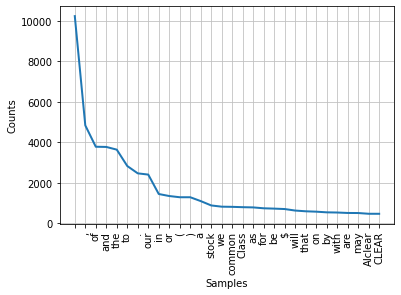

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
freq.plot(30)

In [9]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
filtered_review = [w for w in tokes if not w in stopwords]
filtered_review = [w for w in tokes if not w in string.punctuation]
print('The original review {}\nand the filtered {}'.format(len(tokes), len(filtered_review)))

The original review 116376
and the filtered 105010


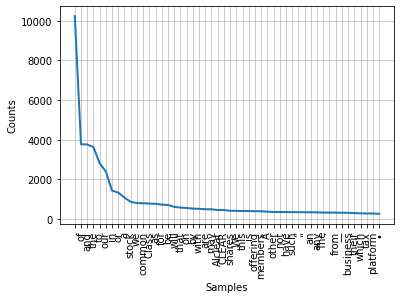

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
freq = nltk.FreqDist(filtered_review)
freq.plot(50)

In [14]:
tokes

['1',
 'tm2112714-14_s1a.htm',
 'S-1/A',
 'TABLE',
 'OF',
 'CONTENTS',
 'As',
 'filed',
 'with',
 'the',
 'Securities',
 'and',
 'Exchange',
 'Commission',
 'on',
 'June',
 '22',
 ',',
 '2021',
 '.',
 'Registration',
 'No',
 '.',
 '333-256851\u200b',
 '\u200b',
 '\u200b',
 'UNITED',
 'STATES',
 'SECURITIES',
 'AND',
 'EXCHANGE',
 'COMMISSION',
 'Washington',
 ',',
 'D.C.',
 '20549',
 '\u200b',
 'AMENDMENT',
 'NO',
 '.',
 '1',
 'TO',
 'FORM',
 'S-1',
 'REGISTRATION',
 'STATEMENT',
 'UNDER',
 'THE',
 'SECURITIES',
 'ACT',
 'OF',
 '1933',
 '\u200b',
 'Clear',
 'Secure',
 ',',
 'Inc.',
 '(',
 'Exact',
 'name',
 'of',
 'registrant',
 'as',
 'specified',
 'in',
 'its',
 'charter',
 ')',
 '\u200b',
 'Delaware',
 '(',
 'State',
 'or',
 'other',
 'jurisdiction',
 'of',
 'incorporation',
 'or',
 'organization',
 ')',
 '\u200b',
 '\u200b',
 '7372',
 '(',
 'Primary',
 'Standard',
 'Industrial',
 'Classification',
 'Code',
 'Number',
 ')',
 '\u200b',
 '\u200b',
 '86-2643981',
 '(',
 'I.R.S',
 '.',


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stopwords, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(tokes)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [30]:
df_ngram['polarity'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

In [31]:
df_ngram[:20]

,frequency,bigram/trigram,polarity,subjective
0,204,post ipo,0.00,0.0
1,57,covid 19,0.00,0.0
2,41,28 50,0.00,0.0
3,31,third party,0.00,0.0
4,31,seidman becker,0.00,0.0
5,31,co founder,0.00,0.0
6,25,forward looking,0.00,0.0
7,23,equity based,0.00,0.0
8,19,200 000,0.00,0.0
9,18,000 000,0.00,0.0


In [33]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline

tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=3)
pipe = make_pipeline(tfidf_vectorizer, lda)
pipe.fit(tokes)
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=3)

Topic #0: third party, equity based, performance based
Topic #1: post ipo, 28 50, non controlling
Topic #2: covid 19, seidman becker, co founder

